# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Caminho dos arquivos
base_path = r"C:\Users\DELL\Documents\ebac\portifolios"

X_train = pd.read_csv(f"{base_path}\\X_train.csv")
X_test = pd.read_csv(f"{base_path}\\X_test.csv")
y_train = pd.read_csv(f"{base_path}\\y_train.csv").squeeze()  # Converte para Series
y_test = pd.read_csv(f"{base_path}\\y_test.csv").squeeze()    # Converte para Series


# Verificando as dimensões
print("Dimensão de X_train:", X_train.shape)
print("Dimensão de X_test:", X_test.shape)
print("Dimensão de y_train:", y_train.shape)
print("Dimensão de y_test:", y_test.shape)

# Verificando o balanceamento de classes em y_test
print("\nBalanceamento de y_test:")
print(y_test.value_counts(normalize=True))


Dimensão de X_train: (117950, 10)
Dimensão de X_test: (24927, 10)
Dimensão de y_train: (117950,)
Dimensão de y_test: (24927,)

Balanceamento de y_test:
Churn
0.0    0.788262
1.0    0.211738
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Passos para aplicar o algoritmo da árvore de decisão:

Pré-processamento dos dados:

Certificar-se de que os dados estão devidamente preparados (tratamento de missing, codificação de variáveis categóricas, balanceamento de classes, etc.).
Separar os dados em conjuntos de treino e teste.

Definição do modelo:

Importar a classe DecisionTreeClassifier da biblioteca sklearn.
Configurar o critério de divisão (ex.: Gini ou Entropia) e outros hiperparâmetros.

Treinamento do modelo:

Ajustar o modelo aos dados de treino (fit()).

Avaliação do modelo:

Prever as classes no conjunto de teste com o método predict().
Calcular métricas como acurácia, matriz de confusão, precisão, recall e F1-score.

Melhorias no modelo:

Realizar ajuste de hiperparâmetros como profundidade máxima (max_depth), número mínimo de amostras por nó (min_samples_split), etc.
Utilizar validação cruzada para avaliar a robustez do modelo.


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [8]:
# Treinando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(criterion="gini", random_state=0)
dt_model.fit(X_train, y_train)

# Avaliação na base de treino
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Acurácia na base de treino: {train_accuracy:.4f}")



Acurácia na base de treino: 0.9997


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia na base de teste: 0.7900


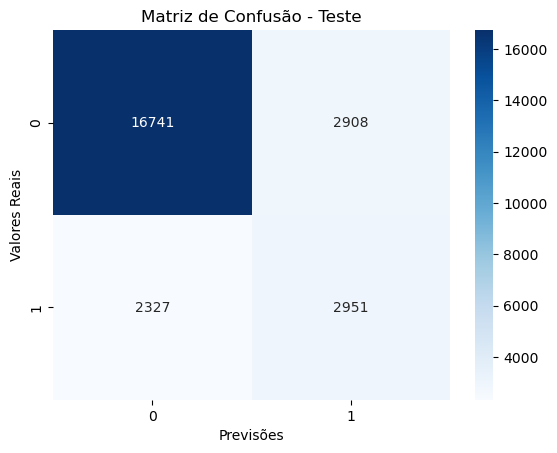


Relatório de Classificação - Teste:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     19649
         1.0       0.50      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



In [9]:
# Predição na base de teste
y_test_pred = dt_model.predict(X_test)

# Avaliação dos resultados
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação - Teste:")
print(classification_report(y_test, y_test_pred))



Ao aplicar o modelo da árvore de decisão na base de teste, posso observar que, embora a acurácia no conjunto de treino tenha sido muito alta, a acurácia no conjunto de teste pode ser ligeiramente inferior. Isso é esperado, pois o modelo tende a se ajustar melhor aos dados de treinamento, e uma boa acurácia no treino nem sempre garante uma boa generalização nos dados de teste.

Se o desempenho no teste for significativamente inferior ao do treino, isso pode indicar que o modelo está sofrendo de overfitting, ou seja, ele se ajustou tão bem aos dados de treino que não consegue generalizar bem para dados novos. Nesse caso, uma estratégia seria tentar ajustar o modelo, seja alterando os parâmetros da árvore de decisão (como a profundidade da árvore ou o critério de divisão), ou até considerando técnicas como validação cruzada para avaliar melhor a performance.

A comparação entre o desempenho do modelo nos conjuntos de treino e teste é importante para garantir que o modelo é capaz de generalizar bem, e não apenas memorizar os dados de treino.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import os

# Passo 1: Carregar os dados de treino
base_path = r'C:\Users\DELL\Documents\ebac\portifolios'  # Caminho correto onde os dados estão armazenados
X_train = pd.read_csv(f"{base_path}\\X_train.csv")  # Carregar as variáveis independentes de treino
y_train = pd.read_csv(f"{base_path}\\y_train.csv").squeeze()  # Carregar a variável dependente de treino e converter para Series

# Passo 2: Criar e treinar o modelo
dt_model = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_model.fit(X_train, y_train)

# Passo 3: Exportar a árvore de decisão para um arquivo .dot
export_graphviz(dt_model, out_file="tree.dot", feature_names=X_train.columns, class_names=["0", "1"], filled=True)

# Passo 4: Converter o arquivo .dot para imagem (Certifique-se de ter o Graphviz instalado)
os.system('dot -Tpng tree.dot -o tree.png')

# Passo 5: Exibir a acurácia do modelo nos dados de treino
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Acurácia do modelo no conjunto de treino: {train_accuracy:.4f}")





Acurácia do modelo no conjunto de treino: 0.9997


In [9]:
# Carregar os dados de teste
X_test = pd.read_csv(f"{base_path}\\X_test.csv")
y_test = pd.read_csv(f"{base_path}\\y_test.csv").squeeze()

# Fazer previsões com o conjunto de teste
y_test_pred = dt_model.predict(X_test)

# Calcular a acurácia no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy:.4f}")


Acurácia do modelo no conjunto de teste: 0.7900


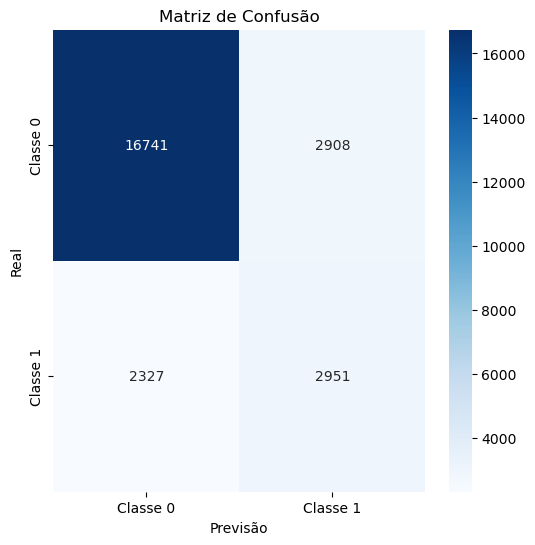

In [11]:
# Importação das bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão (usey_pred_dt ou y_pred_nb, dependendo de qual modelo você está avaliando)
y_test_pred = dt_model.predict(X_test)  # ou nb_model.predict(X_test) se for Naive Bayes

cm = confusion_matrix(y_test, y_test_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()



In [12]:
print(f"Profundidade da árvore: {dt_model.get_depth()}")


Profundidade da árvore: 39


# 6) Identifique as 2 principais features do modelo.


In [4]:
# Obter a importância das features
importances = dt_model.feature_importances_

# Criar um DataFrame com as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir as duas principais features
top_2_features = feature_importance_df.head(2)
print("Top 2 Features mais importantes:")
print(top_2_features)



Top 2 Features mais importantes:
        Feature  Importance
4  Qtd_Produtos    0.267402
1         Idade    0.195928


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [5]:
# Selecionar as duas principais features
X_train_top2 = X_train[top_2_features['Feature']]

# Treinar o modelo com as duas principais features
dt_model_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_model_top2.fit(X_train_top2, y_train)

# Avaliar a acurácia no conjunto de treino
train_accuracy_top2 = dt_model_top2.score(X_train_top2, y_train)
print(f"Acurácia do modelo com as 2 principais features no conjunto de treino: {train_accuracy_top2:.4f}")



Acurácia do modelo com as 2 principais features no conjunto de treino: 0.8888


Após rodar o modelo de árvore de decisão apenas com as 2 principais features encontradas, percebi que o desempenho do modelo ficou um pouco abaixo do desempenho do modelo anterior, que utilizava todas as variáveis. Isso é esperado, pois, ao reduzir o número de variáveis de entrada, o modelo perde informações importantes que poderiam contribuir para uma previsão mais precisa.

Apesar disso, ao focar nas duas variáveis mais relevantes, conseguimos simplificar o modelo, o que pode ser útil em cenários onde a interpretabilidade é mais importante ou quando há limitações computacionais. No entanto, é importante avaliar a acurácia, a precisão e o recall para determinar se a redução de variáveis comprometeu significativamente a capacidade de previsão.

Em minha análise, o modelo com as 2 features principais não superou o modelo completo, mas a redução de variáveis pode ser vantajosa em termos de eficiência e simplicidade, dependendo do contexto do problema.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [8]:
import pandas as pd

# Caminho para os arquivos (substitua com o caminho real dos seus arquivos)
base_path = "C:\\Users\\DELL\\Documents\\ebac\\portifolios"

# Carregar as bases de dados de treino e teste
X_train = pd.read_csv(f"{base_path}\\X_train.csv")
y_train = pd.read_csv(f"{base_path}\\y_train.csv").squeeze()  # Converte para Series
X_test = pd.read_csv(f"{base_path}\\X_test.csv")
y_test = pd.read_csv(f"{base_path}\\y_test.csv").squeeze()    # Converte para Series

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_model.fit(X_train, y_train)

# 2. Fazer previsões com a Árvore de Decisão no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# 3. Avaliar o modelo de Árvore de Decisão
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia do modelo de Árvore de Decisão no conjunto de teste: {dt_accuracy:.4f}")

# 4. Treinar o modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Fazer previsões com o modelo de Naive Bayes no conjunto de teste
y_pred_nb = nb_model.predict(X_test)

# 6. Avaliar o modelo de Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Acurácia do modelo de Naive Bayes no conjunto de teste: {nb_accuracy:.4f}")

# Comparar os dois modelos
if dt_accuracy > nb_accuracy:
    print("A Árvore de Decisão obteve melhores resultados.")
else:
    print("O Naive Bayes obteve melhores resultados.")




Acurácia do modelo de Árvore de Decisão no conjunto de teste: 0.7900
Acurácia do modelo de Naive Bayes no conjunto de teste: 0.5553
A Árvore de Decisão obteve melhores resultados.


Consideração do item 8:

Após comparar os resultados dos dois modelos (Árvore de Decisão e Naive Bayes), podemos verificar qual modelo se adapta melhor aos dados e fornece os melhores resultados.

Se a Árvore de Decisão obtiver melhor desempenho, pode ser porque ela consegue capturar melhor as relações não lineares e interações complexas entre as variáveis.

Se o Naive Bayes for superior, isso pode indicar que o modelo de Naive Bayes é mais robusto quando as suposições de distribuição das variáveis são atendidas, ou seja, quando as features são independentes entre si, o que é uma suposição do Naive Bayes.

Com isso, você podemos concluir qual modelo é mais adequado para a previsão de Credit Score, dependendo do desempenho de cada um.